# <center> <font> Linear and Non Linear Regression</font>
## <center>Regression using a real dataset
### <center>**MODULE:**<br>
<center>Tópicos Especiais em Processamento de sinais: Fusão e modelamento de sinais (ELE-405)<br>
### <center>**Student:**<br>
<center>Carlos Felipe Emygdio de Melo - 00300848
### <center>Lecturers:<br>
<center>Diego Eckhard
<center>Valner João Brusamarello<br><br><br><br><br>
<br><br><br><br><br>
<center>**Federal University of Rio Grande do Sul-UFRGS-PPGEE**
<center>**Porto Alegre/RS - Brazil**
<center>**26/04/2018**

# <center>Linearization<br>
> ## In this first section we will find the equation that best fit in the dataset distribuition. After we find the equation, we will use to methods to optimize this function and find the value of _x_ that returns the minimum value of _f(x)_ <br>



>To find the coefficients of the equation that best describe the dataset, it will be used the follow equation:<br>
<center>**estimator**<br>
<center>$\mathbf{\tilde{\theta} = (\phi^{T}\phi)^{-1}\phi^{T}Y}$<br>
**where:**<br>
$\mathbf{\tilde{\theta} \rightarrow} $ it is the vector of coefficients that we need to find;<br>
$\mathbf{\phi \rightarrow} $ it is the matrix of the functions that accompany the coeeficients in our future equation;<br>
$\mathbf{Y \rightarrow}$ it is the entry values from the dataset;

In [1]:
# cell for imports used through all the code
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.misc import derivative
from numpy.linalg import inv
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import pandas as pd
from scipy.optimize import curve_fit
from numpy.linalg import norm

### <center>a few informations about this dataset:<br>
 - **14 years old or older individuals, unemployed at the month of the reference.
 - Frequency: Monthly from 2012.03 until 2018.02
 - Source: Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua)
 - Unit:People(Thousands)
 - Update at: 17/04/2018**

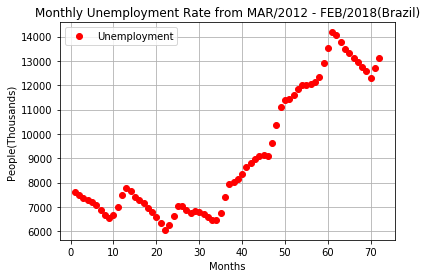

(72L, 1L)


In [2]:
#importing Data Set
df = pd.read_csv("Taxa_desemprego_1.csv",delimiter=';')
input_Data = np.array(df.iloc[:,2:].values)
entry_x = np.arange(1,input_Data.size+1)
plt.plot(entry_x,input_Data,'ro', label = 'Unemployment')
plt.ylabel('People(Thousands)')
plt.xlabel('Months')
plt.grid(True)
plt.title("Monthly Unemployment Rate from MAR/2012 - FEB/2018(Brazil)")
plt.legend()
plt.show()
print(input_Data.shape)

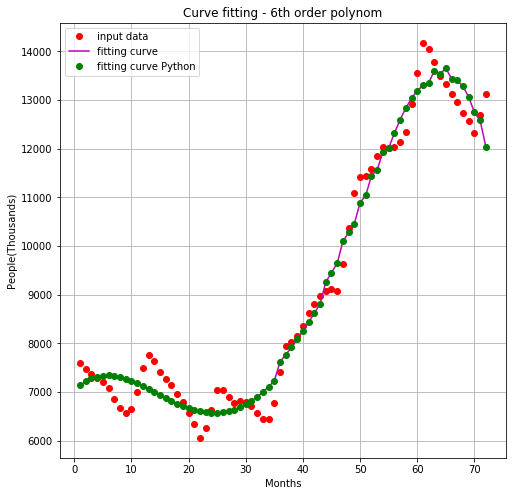

In [3]:
#creates phi
def phi(x):
    z = np.array([np.power(x,6),np.power(x,5),np.power(x,4),np.power(x,3),np.power(x,2),np.power(x,1),np.power(x,0)])
    return z
#creates Rô
ro = np.zeros(7).T
#Creates the data array
data = np.zeros(entry_x.size).T
#creates the capital phi(phizao), which is the vector of phi vectors(which means that capital phi(phizao) is a matrix)
phizao = np.zeros([entry_x.size,ro.size])
#input the data in the data array and the capital phi matrix
for i in xrange(entry_x.size):
    data[i] = input_Data[i] 
    phizao[i] = phi(entry_x[i])
    #computing the coefficients ro
inverse = inv(phizao.T.dot(phizao))
ro = inverse.dot(np.transpose(phizao).dot(data))

#Curve Fit Python 
def func(x, b1, b2, b3, b4, b5, b6, b7): 
    return b1 + b2*x + b3*x**2 + b4*x**3 + b5*x**4 + b6*x**5 + b7*x**6 

popt, pcov = curve_fit(func, entry_x, data) 

data2 = np.zeros(entry_x.size).T
data2 = phizao.dot(ro)
ro2 = popt[::-1]
data3 = phizao.dot(ro2)
plt.figure(figsize=(8,8))
plt.plot(entry_x,data, 'ro', label = 'input data')
plt.plot(entry_x,data2,'m-', label = 'fitting curve')
plt.plot(entry_x,data3,'go', label = 'fitting curve Python')
plt.ylabel('People(Thousands)')
plt.xlabel('Months')
plt.grid(True)
plt.title("Curve fitting - 6th order polynom")
plt.legend()
plt.show()

# <center>Gradient Method

### Method used to find local or global(it can't garantee that the value found is the global value) minimum value of a function<br>
<center>$\mathbf{X_{k+1} = X_{k} - \gamma_{k}\triangledown J(X_{k})}$<br>

**************Gradient Method********************

Gradient: 5.8602588865142025e-05
Initial Point: 60.8644651087781
Current Function Value: [6567.37574852]
 Iterations: 126
 minimum: [24.51478991]



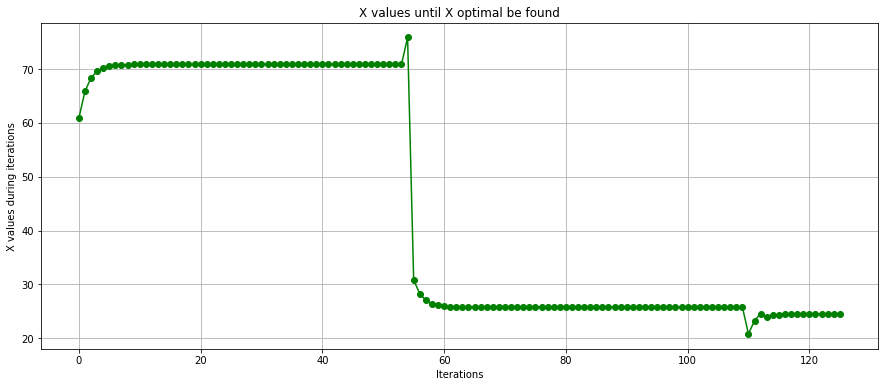

In [4]:
a = entry_x.min()
b = entry_x.max()
#defining tolerance and max number o iterations
gradient_tolerance = 0.0001
max_iteration = 1000
iteration = 1
count = 0
#initial point
x0  = np.random.uniform(entry_x.min(),entry_x.max(),1)
x1 = np.zeros(max_iteration)
x1[0] = x0
#variable to save past gradient value
gradient =np.zeros(max_iteration+1)

# our function that was defined above:
def f(x):
    return ro[0]*x**6+ ro[1]*x**5 + ro[2]*x**4 + ro[3]*x**3 + ro[4]*x**2 + ro[5]*x**1 + ro[6]*x**0

#finding the direction in which the function will go
def deltaf(x):
    return 6*ro[0]*np.power(x,5)+ 5*ro[1]*np.power(x,4) + 4*ro[2]*np.power(x,3) + 3*ro[3]*np.power(x,2) + 2*ro[4]*np.power(x,1) + ro[5]
gradient[0] = deltaf(x0) 
d = -gradient[0]/norm(gradient[0])
df = 1
#defining the size of alpha
alpha = 5
#Implementing the method
while((iteration < max_iteration) and (abs(gradient[iteration-1]) > gradient_tolerance) and (count <= 3)):    
    
    if ((x0 > a) and (x0 <b)):
        x0 = x0 + alpha*d        
        alpha = alpha/2.0
    else:
        x0 = np.random.uniform(entry_x.min(),entry_x.max(),1)
    x1[iteration] = x0
    gradient[iteration] = deltaf(x0)
    d = -gradient[iteration]/norm(gradient[iteration])
    df = f(x1[iteration-1])-f(x1[iteration])
    if (gradient[iteration-1] == gradient[iteration]):
        count = count + 1
    if (count == 3 and (abs(gradient[iteration-1]) > gradient_tolerance)):
        count = 0
        alpha = 5
    iteration = iteration + 1
print('**************Gradient Method********************\n')

print('Gradient: ' + str(gradient[iteration-1]) +'\nInitial Point: ' + str(x1[0]) + '\nCurrent Function Value: ' + str(f(x0)) + '\n Iterations: ' + str(iteration) +'\n minimum: ' + str(x0) + '\n')

#comparing the result with python implemetation of the Nelder-Mead simplex algorithm
# it works with functions of lower order(less complex)
#print('*************Scipy Implementation(Nelder-Mead simplex algorithm)*******************\n\n')
#min = minimize(f,x0=0,method='nelder-mead',options={'xtol': 1e-11, 'disp': True})
#print('\t minimum: ' + str(min.x))

#ploting x's variance until we reach the minimum value of it
plt.figure(figsize=(15,6))
plt.plot(np.arange(iteration), x1[:iteration],'go-')
plt.ylabel('X values during iterations')
plt.xlabel('Iterations')
plt.title("X values until X optimal be found")
plt.grid(True)
plt.show()

# <center>Newton Method

<center>$\mathbf{x_{k+1} = x_{k} - H^{-1}\triangledown J(x_{k})}$<br>
<left> Since we are optmizing an 1 dimension equation the formula above can be simplified as shown below:
<center> $\mathbf{x_{k+1} = x_{k} - \frac{f'(x_{k})}{f''(x_{k})}}$

Minimum: 24.514784482804018
Iterations: 4


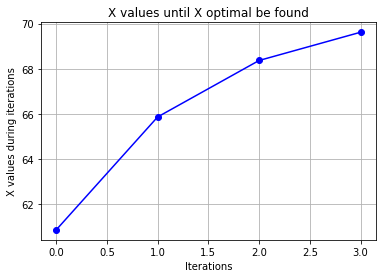

In [5]:
#defining tolerance and max number o iterations
tolerance = 0.00000000001
max_iteration_Newton = 10
iteration = 0

#initial point
x0_Newton  = np.random.uniform(entry_x.min(),entry_x.max(),1) 
x1_Newton = np.zeros(max_iteration)
x1_Newton[0] = x0_Newton


#second derivative of f(x) -> f''(x)
def delta2f(x):
    return 30*ro[0]*np.power(x,4)+20*ro[1]*np.power(x,3)+12*ro[2]*np.power(x,2)+6*ro[3]*np.power(x,1)+2*ro[4]

d = deltaf(x0_Newton)/delta2f(x0_Newton)

while((iteration < max_iteration_Newton - 1) and (abs(d) > tolerance)):
    x1_Newton[iteration+1] = x1_Newton[iteration] - d 
    d = deltaf(x1_Newton[iteration+1])/delta2f(x1_Newton[iteration+1])
    iteration = iteration + 1


print('Minimum: ' + str(x1_Newton[iteration]))
print('Iterations: ' + str(iteration))
plt.plot(np.arange(iteration), x1[:iteration],'bo-')
plt.ylabel('X values during iterations')
plt.xlabel('Iterations')
plt.title("X values until X optimal be found")
plt.grid(True)
plt.show()

# <center>Non Linear Regression

### <center>a few informations about this dataset:<br>
 - Dataset Name: Misra1b (Misra1b.dat);
 - These data are the result of a NIST study regarding dental research in monomolecular adsorption.The response variable is volume, and the predictor variable is pressure;
 - Source: NIST/ITL StRD;
 - Reference: Misra, D., NIST (1978). Dental Research Monomolecular Adsorption Study.;
 - Update at: 17/04/2018**

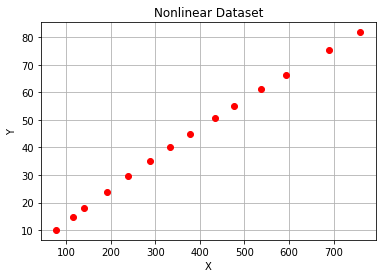

In [123]:
#importing Data Set
df = pd.read_csv("Dental_research.csv",delimiter=';')
input_Data_Nonlinear = np.array(df.iloc[:,0].values)
entry_x_Nonlinear = np.array(df.iloc[:,1].values)
plt.plot(entry_x_Nonlinear,input_Data_Nonlinear,'ro')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
plt.title("Nonlinear Dataset")
plt.show()

In [34]:
# y = b1 * (1-(1+b2*x/2)**(-2))
def f(theta, x):
    return theta[0]*(1-(1+theta[1]*x/2)**(-2))

#df = [df/dtheta1, df/dtheta2] 
def df(theta,x):
    return np.array([(1-(1+theta[1]*x/2)**(-2)), (8*x*theta[0])/(x*theta[1]+2)**3])
# function that we will minimize
def j(theta, x, y):
    return np.dot(np.transpose(y-f(theta,x)), y-f(theta,x))
#derivative of j
def dj(theta, x, y):
    return 2*np.dot( np.transpose(y-f(theta,x)), (-1)*np.transpose(df(theta,x)))
#hessian
def hessian(theta, x):
    return 2*np.dot(df(theta,x),np.transpose(df(theta,x)))


## <center>Gradient Method
This method return a good approximation of the best values for the coefficient of the equation that best describe the data of the dataset.  

In [51]:
# initial value
thetas = np.array([346, 0.0002])
alpha = np.array([0.02, 0.0001])
num_attempts = 100000

i = 1;
while (i<=num_attempts):
    dJ= dj(thetas, entry_x_Nonlinear, input_Data_Nonlinear)
    thetas = thetas - alpha*dJ/np.abs(dJ)
    i = i + 1
#printing the results    
#print(thetas)

#plotting the results
y = f(thetas,entry_x_Nonlinear)
plt.plot(entry_x_Nonlinear,y,'r-',entry_x_Nonlinear, input_Data_Nonlinear,'go')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
plt.title("Nonlinear Dataset")
plt.show()

[3.4604e+02 4.0000e-04]


## <center>Newton's Method<br>
    
This method should return a better value for the coefficients if the initial value is very near of the best value for the coefficients. It common to run first the Gradient Method to give us a good aproximation of the best value of the coefficient and only then use the Newton's method to find the best value of the coefficients.

In [56]:
iterations_Newton = 100
it = 0
initial_value = thetas
while (it<iterations_Newton):
    h = hessian(thetas,entry_x_Nonlinear)
    DJ = dj(thetas,entry_x_Nonlinear,input_Data_Nonlinear).T
    thetas = thetas - np.dot(inv(h),DJ)
    it = it + 1
#print (thetas)

y = f(thetas,entry_x_Nonlinear)
plt.plot(entry_x_Nonlinear,y,'r-',entry_x_Nonlinear, input_Data_Nonlinear,'go')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
plt.title("Nonlinear Dataset")
plt.show()

[3.37997462e+02 3.90390913e-04]


## <center><font color = 'green'> Now let's use a trickier dataset, with a more complicate equation

### <center><font color = blue>a few informations about this dataset:<br>
 - Dataset Name: Eckerle4 (Eckerle4.dat);
 - These data are the result of a NIST study involving circular interference transmittance. The response variable is transmittance, and the predictor variable is wavelength;
 - Source: NIST/ITL StRD;
 - Reference: Eckerle, K., NIST (197?). Circular Interference Transmittance Study;
 - Update at: 8/05/2018**

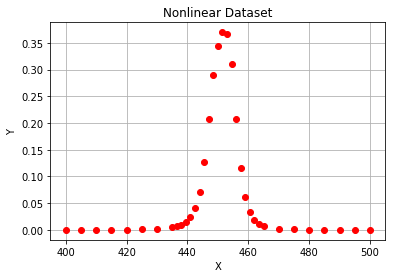

35

In [64]:
#importing Data Set
df = pd.read_csv("DataSet_2.csv",delimiter=',')
input_Data_Nonlinear = np.array(df.iloc[:,0].values)
entry_x_Nonlinear = np.array(df.iloc[:,1].values)
plt.plot(entry_x_Nonlinear,input_Data_Nonlinear,'ro')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
plt.title("Nonlinear Dataset")
plt.show()

In [67]:
# y = (b1/b2) * exp[-0.5*((x-b3)/b2)**2]
def f(theta, x):
    return (theta[0]/theta[1])*np.exp(-0.5*((x-theta[2])/theta[1])**2)

#df = [df/dtheta1, df/dtheta2] 
def df(theta,x):
    return np.array([np.exp(-0.5*((x-theta[2])/theta[1])**2)/theta[1],
                      (theta[0]*np.exp(-0.5*((x-theta[2])/theta[1])**2)*(x**2-2*x*theta[2]+theta[2]**2-theta[1]**2))/theta[1]**4,
                      (theta[0]*(x-theta[2])*np.exp(-0.5*((x-theta[2])/theta[1])**2))/theta[1]**3])
# function that we will minimize
def j(theta, x, y):
    return np.dot(np.transpose(y-f(theta,x)), y-f(theta,x))
#derivative of j
def dj(theta, x, y):
    return 2*np.dot( np.transpose(y-f(theta,x)), (-1)*np.transpose(df(theta,x)))
#hessian
def hessian(theta, x):
    return 2*np.dot(df(theta,x),np.transpose(df(theta,x)))

## <center>Gradient Method
This method return a good approximation of the best values for the coefficient of the equation that best describe the data of the dataset.  

In [108]:
# initial value
thetas = np.array([1.5, 5, 450])
alpha = np.array([0.001, 0.0001, 0.001])
num_attempts = 10000

i = 1;
while (i<=num_attempts):
    dJ= dj(thetas, entry_x_Nonlinear, input_Data_Nonlinear)
    thetas = thetas - alpha*dJ/np.abs(dJ)
    i = i + 1
# print the result    
#print(thetas)
#plotting the result
thetas_bestFit = np.array([1.5543,4.0888, 451.54])
y = f(thetas,entry_x_Nonlinear)
y_2 = f(thetas_bestFit,entry_x_Nonlinear)
plt.figure(figsize=(15,6))
plt.plot(entry_x_Nonlinear,input_Data_Nonlinear,'ro', label='input data')
plt.plot(entry_x_Nonlinear, y,'g-', label='Gradient_Method_coeff\'s')
plt.plot(entry_x_Nonlinear, y_2,'bo', label='Best_Fit_coeff\'s')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
plt.legend()
plt.title("Nonlinear Dataset - 2")
plt.show()

[  1.554   4.09  451.542]


## <center>Newton's Method<br>
    
This method should return a better value for the coefficients if the initial value is very near of the best value for the coefficients. It common to run first the Gradient Method to give us a good aproximation of the best value of the coefficient and only then use the Newton's method to find the best value of the coefficients. 

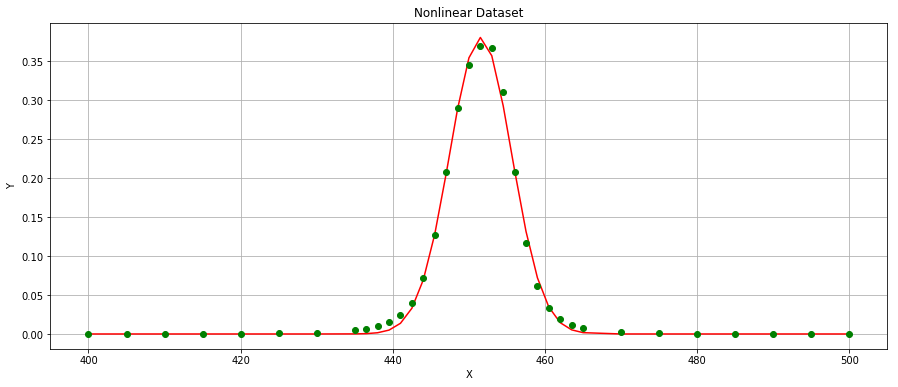

In [121]:
iterations_Newton = 100
it = 0
initial_value = thetas
while (it<iterations_Newton):
    # calculating an aproximation of the hessian. 
    #Using a short cut without using second derivative
    h = hessian(thetas,entry_x_Nonlinear)
    DJ = dj(thetas,entry_x_Nonlinear,input_Data_Nonlinear).T
    thetas = thetas - np.dot(inv(h),DJ)
    it = it + 1
#print (thetas)
#plotting the results
y = f(thetas,entry_x_Nonlinear)
plt.figure(figsize=(15,6))
plt.plot(entry_x_Nonlinear,y,'r-',entry_x_Nonlinear, input_Data_Nonlinear,'go')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
plt.title("Nonlinear Dataset - 2")
plt.show()

# <center>Bibliographic References

 - 11 bases de dados gratuitas para mineração, estudos e testes. Big Data Business. Disponível em: <http://www.bigdatabusiness.com.br/6-bases-de-dados-gratuitas-para-mineracao-estudos-e-testes/>. Acesso em: 24  abr.  2018.;
 - Ipeadata. Ipeadata.gov.br. Disponível em: <http://www.ipeadata.gov.br/Default.aspx>. Acesso em: 24  abr.  2018.;
 - StRD Dataset Misra1b. Itl.nist.gov. Disponível em: <https://www.itl.nist.gov/div898/strd/nls/data/misra1b.shtml>. Acesso em: 3  maio  2018.;
 - Itl.nist.gov. (2018). [online] Available at: https://www.itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Eckerle4.dat [Accessed 8 May 2018].